In [60]:
import tensorflow as tf 
import tensorflow.keras as K
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optim

import numpy as np
import pandas as pd
from minisom import MiniSom
import time

In [61]:
PATH = r"C:\Users\suyash\Desktop\toxic\tox21_dense_train.csv"
data = pd.read_csv(PATH).values
labels = pd.read_csv(PATH).columns
labels

Index(['Unnamed: 0', 'AW', 'AWeight', 'Arto', 'BertzCT', 'Chi0', 'Chi1',
       'Chi10', 'Chi2', 'Chi3',
       ...
       'W3D', 'W3DH', 'WNSA1', 'WNSA2', 'WNSA3', 'WPSA1', 'WPSA2', 'WPSA3',
       'grav', 'rygr'],
      dtype='object', length=802)

In [62]:
for x in range(799):
    if max(data[:, 3:][:, x])!=min(data[:, 3:][:, x]):
        xtr = (data[:, 3:][:, x]-np.mean(data[:, 3:][:, x]))/(max(data[:, 3:][:, x])-min(data[:, 3:][:, x]))
        data[:, 3:][:, x] = xtr
    else:
        xtr = (data[:, 3:][:, x])/(max(data[:, 3:][:, x])+min(data[:, 3:][:, x])+1e-10)+0.5
        data[:, 3:][:, x] = xtr

In [63]:
data = data[:, 3:]

In [64]:
xtrain = np.array(data[:10000], dtype="float32")
xvalid = np.array(data[10000:12000], dtype="float32")

In [65]:
r = 20
c = 20
iter = 5000
sigma = 1
lr = 0.5

In [66]:
som = MiniSom(x= r, y=c, input_len=799, sigma=sigma, learning_rate=lr)
som.random_weights_init(xtrain)

In [67]:
start = time.time()
som.train_random(xtrain, iter, verbose=1)
elapsed = time.time()-start
print(elapsed, "seconds")

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1.0222283558681253
40.280661821365356 seconds


In [68]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in xtrain]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, [r,c])

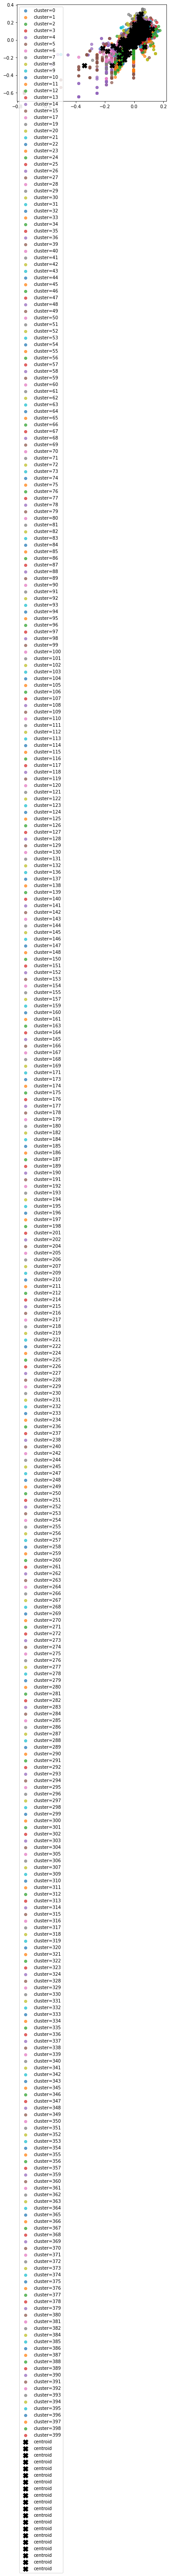

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(xtrain[cluster_index == c, 0],
                xtrain[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=5, color='k', label='centroid')
plt.legend();